# Image visualization basics for dynamic PET

This notebook illustrates how to read in a 4-D PET image, extract basic scan information, plot a 4-D time activity curve (TAC) and display PET image. 
We import parent directory- dynamicpet and bids image.
We define PET image as 'example_pet' and it's directory.
'a' is defined as a volume in PET image with all time-points. 'b'is defined as mid-frame of the image.
Matplotlib can be used for displaying the figure/plot , if error occurs use nilearn instead. label x-axis and y-axis.


Note: to look at output variables while you run the code, click 'Variables' on top toolbar. It will display variables from the code nest to 'Terminal' in 'Jupyter' tab.

In [12]:
from pathlib import Path

import matplotlib.pyplot as plt
import requests
from nilearn import plotting
from nilearn.image import index_img

from dynamicpet.petbids.petbidsimage import load

In [17]:
outdir = Path.cwd() / "nb_data"
outdir.mkdir(exist_ok=True)

petjson_fname = outdir / "pet.json"
pet_fname = outdir / "pet.nii"

baseurl = "https://s3.amazonaws.com/openneuro.org/ds001705/sub-000101/ses-baseline/"

peturl = (
    baseurl
    + "pet/sub-000101_ses-baseline_pet.nii"
    + "?versionId=rMjWUWxAIYI46DmOQjulNQLTDUAThT5o"
)

if not petjson_fname.exists():
    r = requests.get(
        baseurl
        + "pet/sub-000101_ses-baseline_pet.json"
        + "?versionId=Gfkc8Y71JexOLZq40ZN4BTln_4VObTJR",
        timeout=10,
    )
    r.raise_for_status()
    with open(petjson_fname, "wb") as f:
        f.write(r.content)

if not pet_fname.exists():
    with requests.get(peturl, timeout=10, stream=True) as r:
        r.raise_for_status()
        with open(pet_fname, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

In [ ]:
example_pet = load(pet_fname)

type(example_pet)
type(example_pet.img)
type(example_pet.dataobj)

In [ ]:
plotting.plot_anat(index_img(example_pet.img, 4), colorbar=True)

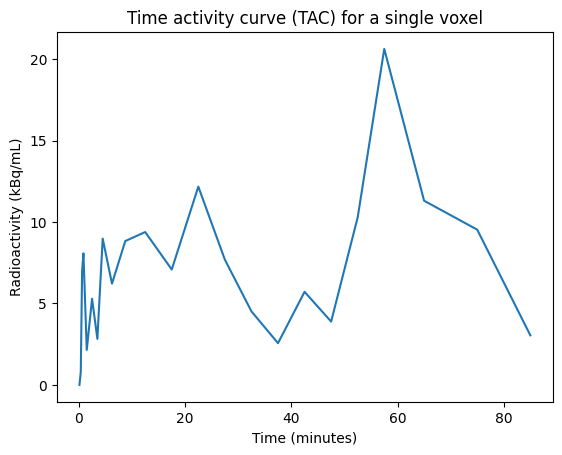

In [28]:
voxel_coords = (100, 100, 100)

voxel_tac = example_pet.dataobj[*voxel_coords, ...]
time = example_pet.frame_mid

plt.figure()
plt.plot(time, voxel_tac)
plt.xlabel("Time (minutes)")
plt.ylabel(f'Radioactivity ({example_pet.json_dict["Units"]})')
plt.title('Time activity curve (TAC) for a single voxel');

In [ ]:
!kineticmodel --help

We import nilearn for dispplaying PET image, 'example.img' is PET image and 'example.json_dict' has all image information. We plot as an example, 4th volume of the image with colorbar set to 'true'.

In [22]:
example_pet.json_dict

{'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'Biograph mMr',
 'Units': 'kBq/mL',
 'TracerName': 'LondonPride',
 'TracerRadionuclide': 'C11',
 'BodyPart': 'brain',
 'InjectedRadioactivity': 400.0,
 'InjectedRadioactivityUnits': 'MBq',
 'InjectedMass': 5.0,
 'InjectedMassUnits': 'ug',
 'SpecificRadioactivity': 35.0,
 'SpecificRadioactivityUnits': 'GBq/ug',
 'ModeOfAdministration': 'bolus',
 'TimeZero': '09:45:00',
 'ScanStart': 0,
 'InjectionStart': 0,
 'FrameTimesStart': [0,
  15,
  30,
  45,
  60,
  120,
  180,
  240,
  300,
  450,
  600,
  900,
  1200,
  1500,
  1800,
  2100,
  2400,
  2700,
  3000,
  3300,
  3600,
  4200,
  4800],
 'FrameDuration': [15,
  15,
  15,
  15,
  60,
  60,
  60,
  60,
  150,
  150,
  300,
  300,
  300,
  300,
  300,
  300,
  300,
  300,
  300,
  300,
  600,
  600,
  600],
 'InjectionEnd': 30,
 'AcquisitionMode': '3D',
 'ImageDecayCorrected': True,
 'ImageDecayCorrectionTime': 0,
 'ReconMethodName': 'MLEM',
 'ReconMethodParameterLabels': ['iteratio

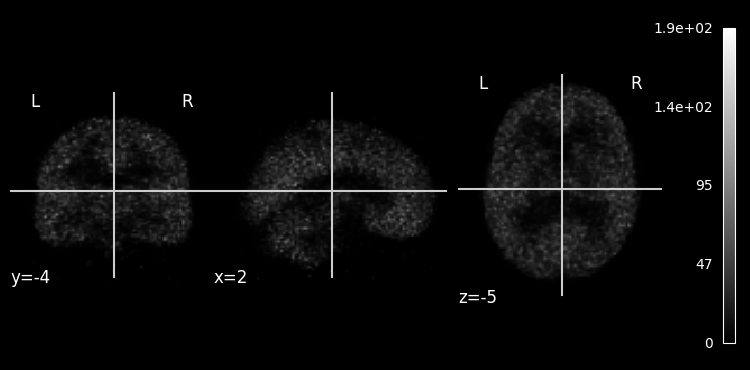

In [23]:
plotting.plot_anat(index_img(example_pet.img, 4), colorbar=True)